# Bajas médicas en territorio español relacionadas con la enfermedad mental(2018-2021)


Sobre los datos:
    
* Los datos relativos al año 2021 corresponden al período de enero a 22 de octubre (día de extracción de los datos).

In [91]:
import pandas as pd
import csv

data = pd.read_csv ("salud_mental.csv")

cie = {}
with open("cie10.csv") as f:
    r = csv.DictReader(f)
    for row in r:
        cie[row["código"]] = row["título"]
        
cnae = {}
with open("cnae.csv") as f:
    r = csv.DictReader(f)
    for row in r:
        cnae[row["cnae"]] = row["descripción"]
data


año diagnóstico cnae   edad    sexo  situación  media
0      2018      F01.50    A  46-55  HOMBRE        1.0  296.0
1      2018      F01.50    H  56-65  HOMBRE        1.0  226.0
2      2018      F01.50    M  46-55   MUJER        1.0  219.0
3      2018      F01.51    A  56-65  HOMBRE        1.0  411.0
4      2018       F02.8    0  46-55  HOMBRE        1.0  545.0
...     ...         ...  ...    ...     ...        ...    ...
64488  2021         F99    Q  56-65  HOMBRE        1.0   19.0
64489  2021         F99    R  16-25  HOMBRE        1.0   12.0
64490  2021         F99    R  26-35   MUJER        1.0    7.0
64491  2021         F99    S  26-35   MUJER        1.0   22.0
64492  2021         F99    S  26-35  HOMBRE        1.0   17.0

[64493 rows x 7 columns]

## Total de bajas por año y sexo

Clara tendencia al alza entre los años 2018 y 2020. La bajada del año 2021 puede que se deba a que los datos son incompletos (ver nota al inicio) y el efecto de los ERTE.

In [75]:
group=data.groupby(["año", "sexo"]).sum().unstack()["media"].plot.bar()

### Top 10 diagnósticos por sexo y edad en 2020.
#### Hombre 26-35

In [76]:
año=2020
group=data.groupby(["año", "sexo", "diagnóstico", "edad"]).sum().unstack()["media"]

sexo="HOMBRE"
edad="26-35"
#group.loc[2018].loc["MUJER"].sort_values(ascending=False).head(10)
group.loc[año].loc[sexo][edad].sort_values(ascending=False).rename(index=lambda x: cie[x]).head(10).to_frame()

26-35
diagnóstico                                                
Episodio depresivo grave sin síntomas psicóticos.   3327.40
Trastorno depresivo recurrente                      3144.33
Trastorno depresivo recurrente                      3030.42
Trastorno anancástieo de la personalidad.           2994.00
Consumo de otra sustancia psicoactiva no especi...  2949.20
Episodio depresivo sin especificación.              2885.36
Otros episodios depresivos especificados.           2861.22
Psicosis no orgánica sin especificación.            2805.18
Episodio depresivo moderado.                        2802.42
Trastorno bipolar sin especificación.               2648.50

#### Mujer 16-25

In [77]:
sexo="MUJER"
edad="16-25"
group.loc[año].loc[sexo][edad].sort_values(ascending=False).rename(index=lambda x: cie[x]).head(10).to_frame()

16-25
diagnóstico                                                
Trastorno de la conducta alimentaria sin especi...  2540.40
Episodio depresivo sin especificación.              2112.66
Trastornos de adaptación. Con predominio de alt...  2063.50
Anorexia nerviosa                                   1995.36
Bulimia nerviosa.                                   1892.30
Trastornos de ideas delirantes persistentes.        1726.75
Trastornos de adaptación. Reacción depresiva pr...  1631.65
Dependencia de cocaína                              1627.00
Trastorno depresivo recurrente                      1609.00
Otros trastornos de las emociones en la infancia.   1483.50

#### Mujer 26-35

In [78]:
sexo="MUJER"
edad="26-35"
group.loc[año].loc[sexo][edad].sort_values(ascending=False).rename(index=lambda x: cie[x]).head(10).to_frame()

26-35
diagnóstico                                                
Factores psicológicos y del comportamiento en t...  3625.14
Trastorno depresivo recurrente                      3179.85
Agorafobia                                          3107.15
Otros episodios depresivos especificados.           3052.71
Trastorno bipolar sin especificación.               3034.95
Episodio depresivo sin especificación.              3027.62
Trastornos de adaptación. Con predominio de alt...  3015.08
Episodio depresivo moderado.                        2772.67
Anorexia nerviosa                                   2752.04
Trastorno obsesivo-compulsivo.                      2707.83

#### Hombre 36-45

In [79]:
sexo="HOMBRE"
edad="36-45"
group.loc[año].loc[sexo][edad].sort_values(ascending=False).rename(index=lambda x: cie[x]).head(10).to_frame()

36-45
diagnóstico                                                
Trastorno de la personalidad sin especificación.    4271.98
Episodio depresivo moderado.                        3957.23
Psicosis no orgánica sin especificación.            3838.79
Otros tipos de esquizofrenia                        3626.63
Episodios depresivos.                               3544.00
Trastornos de adaptación. Con predominio de alt...  3493.88
Trastorno depresivo recurrente sin especificación.  3467.07
Otros episodios depresivos especificados.           3324.38
Episodio maníaco sin síntomas psicóticos            3316.19
Episodio depresivo sin especificación.              3118.12

#### Mujer 36-45

In [80]:
sexo="MUJER"
edad="36-45"
group.loc[año].loc[sexo][edad].sort_values(ascending=False).rename(index=lambda x: cie[x]).head(10).to_frame()

36-45
diagnóstico                                                
Trastorno de la personalidad sin especificación.    4023.51
Episodio depresivo grave sin síntomas psicóticos.   3803.84
Trastorno depresivo recurrente                      3787.17
Trastorno depresivo recurrente sin especificación.  3780.66
Otros trastornos depresivos recurrentes.            3748.95
Trastorno bipolar sin especificación.               3724.49
Otros episodios depresivos.                         3709.71
Trastorno del estado de ánimo debido a afección...  3628.31
Episodio depresivo sin especificación.              3568.97
Trastorno depresivo recurrente                      3566.90

#### Hombre 46-55

In [81]:
sexo="HOMBRE"
edad="46-55"
group.loc[año].loc[sexo][edad].sort_values(ascending=False).rename(index=lambda x: cie[x]).head(10).to_frame()

46-55
diagnóstico                                                
Trastorno depresivo recurrente sin especificación.  4716.86
Episodio depresivo sin especificación.              4094.37
Episodio depresivo grave sin síntomas psicóticos.   4079.68
Trastornos del humor (afectivos) persistentes.      4074.50
Psicosis no orgánica sin especificación.            4018.93
Trastornos de adaptación. Con predominio de alt...  3878.44
Trastorno disocial sin especificación.              3873.33
Trastorno depresivo recurrente                      3742.74
Trastorno depresivo recurrente                      3703.81
Trastorno depresivo recurrente                      3674.62

#### Mujer 46-55

In [82]:
sexo="MUJER"
edad="46-55"
group.loc[año].loc[sexo][edad].sort_values(ascending=False).rename(index=lambda x: cie[x]).head(10).to_frame()

46-55
diagnóstico                                                
Episodio depresivo grave sin síntomas psicóticos.   4700.24
Trastorno depresivo recurrente                      4601.46
Trastorno depresivo recurrente                      4399.63
Trastorno bipolar sin especificación.               3779.41
Episodio depresivo moderado.                        3676.85
Episodio depresivo sin especificación.              3623.54
Trastorno depresivo recurrente sin especificación.  3562.96
Trastornos de adaptación. Con predominio de alt...  3487.79
Trastorno depresivo recurrente.                     3467.47
Otros episodios depresivos.                         3436.76

#### Hombre 56-65

In [83]:
sexo="HOMBRE"
edad="56-65"
group.loc[año].loc[sexo][edad].sort_values(ascending=False).rename(index=lambda x: cie[x]).head(10).to_frame()

56-65
diagnóstico                                                
Episodio depresivo grave sin síntomas psicóticos.   4977.34
Otros episodios depresivos.                         4936.52
Trastorno depresivo recurrente                      4650.02
Episodio depresivo moderado.                        4483.49
Trastornos de adaptación. Con predominio de alt...  4432.69
Episodio depresivo sin especificación.              4265.53
Demencia vascular sin alteración del comportami...  4001.75
Trastornos de adaptación. Reacción depresiva pr...  3913.00
Distimia.                                           3865.20
Trastorno depresivo recurrente.                     3718.29

#### Mujer 56-65

In [84]:
sexo="MUJER"
edad="56-65"
group.loc[año].loc[sexo][edad].sort_values(ascending=False).rename(index=lambda x: cie[x]).head(10).to_frame()

56-65
diagnóstico                                                
Episodio depresivo grave sin síntomas psicóticos.   4702.42
Otros trastornos depresivos recurrentes.            4638.49
Episodio depresivo sin especificación.              4623.21
Episodio depresivo moderado.                        4546.76
Trastornos de adaptación. Con predominio de alt...  4252.98
Trastorno depresivo recurrente sin especificación.  4086.91
Episodio depresivo grave con síntomas psicóticos.   3989.94
Trastorno de ansiedad generalizada.                 3976.93
Trastorno depresivo recurrente.                     3966.62
Trastorno depresivo recurrente                      3946.43

## Comparativa según edad (2020)

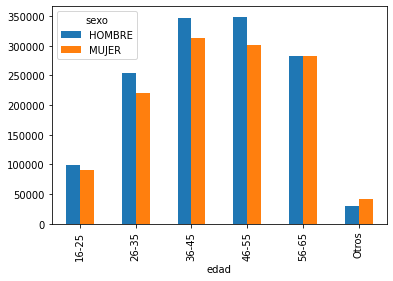

In [87]:
group=data[data["año"]==2020].groupby(["edad", "sexo"]).sum().unstack()["media"].plot.bar()

### Comparativa según sector profesional (2020)

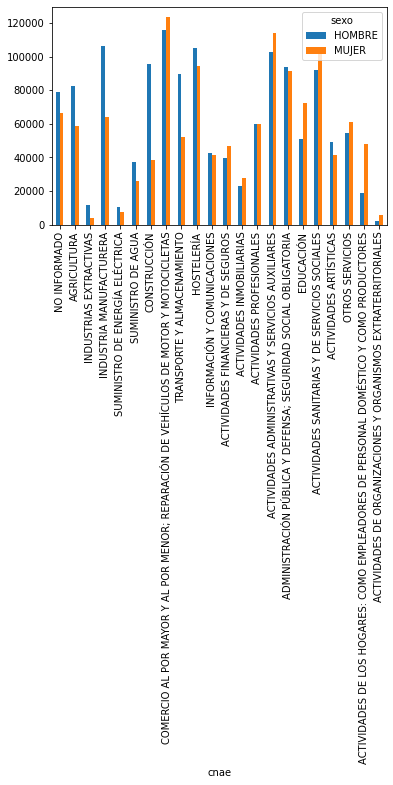

In [93]:
group=data[data["año"]==2020].groupby(["cnae", "sexo"]).sum().unstack().rename(index=lambda x: cnae[x])["media"].plot.bar()

## Fuentes

Datos: [Solicitud de informe al Ministerio de Inclusión, Seguridad Social y Migraciones, recabando informe detallado del número de bajas médicas tramitadas ante la Seguridad Social entre los años 2018 y 2021 en todo el territorio español. (186/003497)](https://www.congreso.es/busqueda-de-iniciativas?p_p_id=iniciativas&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&_iniciativas_mode=mostrarDetalle&_iniciativas_legislatura=XIV&_iniciativas_id=186%2F003496) 

Títulos CIE10: https://www.psicoactiva.com/cie10/

Descripción CNAE: https://www.cnae.com.es/index.php

